# 目标
在一个折线图里面，展示一个 100 维的向量，以及这个向量经过 softmax 之后向量，

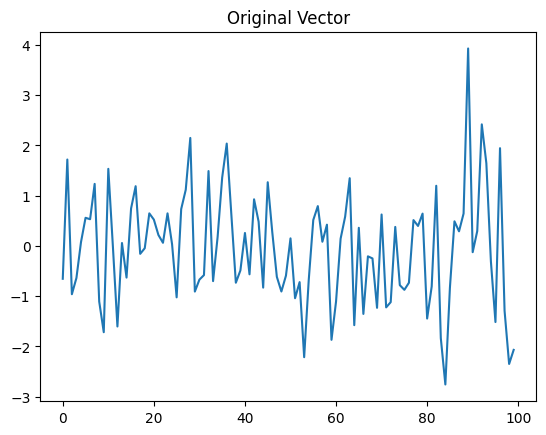

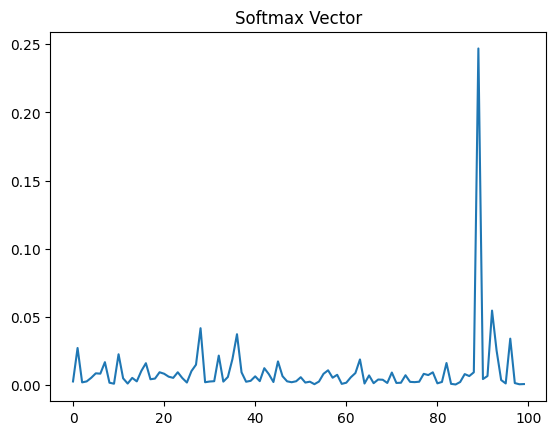

In [5]:

import torch.nn.functional as F
import matplotlib.pyplot as plt 
import torch        
import numpy as np

#随机一个 100 维的向量，在折线图里展示
x = torch.randn(100)
plt.plot(np.arange(100), x.numpy())
plt.title("Original Vector")
plt.show() 
# 将x经过softmax
x_softmax = F.softmax(x, dim=0)
# 在折线图里展示x_softmax
plt.plot(np.arange(100), x_softmax.numpy())
plt.title("Softmax Vector")
plt.show()

In [ ]:
import torch        


# test tempreture
# torch.multinomial(input, num_samples, replacement=False)
# input: 输入张量，必须是 1 维的，每个元素的概率值必须在 [0, 1] 之间
# num_samples: 要抽取的样本数量
# replacement: 是否允许重复抽取，默认值为 False
test_data = torch.randn(1, 10)
print("test_data: ", test_data)
test_data = torch.softmax(test_data, dim=-1)
print("test_data: ", test_data)
max = torch.max(test_data, dim=-1)
print("max: ", max)
sample = torch.multinomial(test_data, num_samples=1, replacement=False)
print("sample: ", sample)


orig_data:  tensor([[0.0248, 0.0417, 0.2281, 0.0786, 0.3157, 0.0783, 0.0256, 0.1105, 0.0108,
         0.0860]])
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])


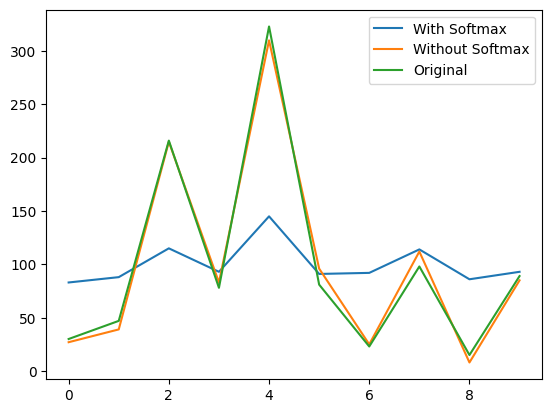

samples_with_softmax:  tensor([ 83.,  88., 115.,  93., 145.,  91.,  92., 114.,  86.,  93.])
samples_without_softmax:  tensor([ 27.,  39., 215.,  83., 310.,  96.,  25., 112.,   8.,  85.])
samples_orig:  tensor([ 30.,  47., 216.,  78., 323.,  81.,  23.,  98.,  15.,  89.])


In [ ]:
import torch

orig_data = torch.randn(1, 10)
# 先进行一次softmax
orig_data = torch.softmax(orig_data, dim=-1)
print("orig_data: ", orig_data)


# scale data with temperature
test_data = orig_data / 0.5
# scale data 之后是否需要重新进行 softmax 归一化？
# 答案：不需要，因为 softmax 函数是一个单调递增函数，对数据进行缩放不会改变数据的相对大小关系 
# tare 胡说八道
# 还是要对 test_data 进行 softmax 归一化

# 是否进行 softmax 的两种数据分别进行采用，对比结果
# 将结果在 plot 上展示
import matplotlib.pyplot as plt

data_with_softmax = torch.softmax(test_data, dim=-1)
data_without_softmax = test_data


#计数统计10 个（orig_data的长度）位置上被采样到的次数
samples_with_softmax = torch.zeros(10)
samples_without_softmax = torch.zeros(10)
samples_orig = torch.zeros(10)

print(samples_orig)





# 每次采用以后修改被采用位置的机制
for _ in range(1000):
    # 从 data_with_softmax 中采样一个位置
    idx_with_softmax = torch.multinomial(data_with_softmax, num_samples=1)
    # 从 data_without_softmax 中采样一个位置
    idx_without_softmax = torch.multinomial(data_without_softmax, num_samples=1)
    # 从 orig_data 中采样一个位置
    idx_orig = torch.multinomial(orig_data, num_samples=1)
    
    # 统计被采样到的位置
    samples_with_softmax[idx_with_softmax] += 1
    samples_without_softmax[idx_without_softmax] += 1
    samples_orig[idx_orig] += 1

# 用 plot 展示，横坐标为 10 个位置，纵坐标为被采样到的次数
plt.plot(samples_with_softmax, label='With Softmax')
plt.plot(samples_without_softmax, label='Without Softmax')
plt.plot(samples_orig, label='Original')
plt.legend()
plt.show()



print("samples_with_softmax: ", samples_with_softmax)
print("samples_without_softmax: ", samples_without_softmax)
print("samples_orig: ", samples_orig)

# 正确答案是，必须经过 softmax，否则数据采样结果不会改变，是 放大缩小之后再进行softmax才起了作用

In [ ]:
# tok-k
# 先从数据中选取 top k 个数据，然后将其他数据设置为一个非常小的数（如负无穷大）
# 重新进行softmax，得到的结果就是 top k 个数据的概率分布
# 最后再进行采样
test_data = torch.randn(10) 
print(test_data)


tensor([ 0.2019, -0.1982, -0.2276,  0.1646,  2.0727, -1.4005, -1.7568, -0.1472,
         1.2566,  0.9773])
top k indices:  tensor([4, 8, 9])
tensor([  -inf,   -inf,   -inf,   -inf, 2.0727,   -inf,   -inf,   -inf, 1.2566,
        0.9773])
tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.5629, 0.0000, 0.0000, 0.0000, 0.2489,
        0.1882])
tensor([8])


In [ ]:

sample = torch.topk(test_data, k=3)
print("top k indices: ", sample.indices)
new_data = test_data.clone()
print(torch.arange(new_data.size(0)))
# 将sample.indices之外的其他数据设为负无穷大
new_data[~torch.isin(torch.arange(new_data.size(0)), sample.indices)] = float('-inf')
print(new_data)

new_data = torch.softmax(new_data, dim=-1)
print(new_data)
final_sample = torch.multinomial(new_data, num_samples=1)
print(final_sample)


top k indices:  tensor([4, 8, 9])
tensor([  -inf,   -inf,   -inf,   -inf, 2.0727,   -inf,   -inf,   -inf, 1.2566,
        0.9773])
tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.5629, 0.0000, 0.0000, 0.0000, 0.2489,
        0.1882])
tensor([4])
